# INTRODUCTION
* I will explain how to make ROC for binary labeled data
* In this tutorial we will learn how to use
* Random forest classifier
* 5 fold cross validation
* ROC Curve
* AUC
* Visualize

In [ ]:
AUC-ROC Curve is such an element of evaluation metric that is used to visualize the performance of a classification model

It is a performance measurement metric of classification model at different threshold values

In [ ]:
ROC Curve or Receiver Operating characteristic curve represents a probability graph to show the performance of a classification
model at different threshold levels
Two parameters of ROC:
    True Positive rate or TPR
    False Positive rate or FPR
    
TPR = Recall = TP/(TP+FN)

FPR = FP/(FP+TN)

In [ ]:
AUC Curve = Area under ROC Curve
AUC Calculates 2 dimensional area under entire ROC Curve ranging from (0,0) to (1,1)
AUC ranges from 0 to 1 (excellent model = 1 = will show good measure of seperabilty)

In [ ]:
When do u use AUC-ROC
1. AUC is used to measure how well predictions are ranked instead of giving their absolute values = Scale invariant
It measures quality of predictions of model without considering selected classification threshold = classification threshold invariance

When not to use AUC
1. AUC is not preferable when we need to calibrate probability o/p
2. AUC is not useful metric when there are wide disparities in the cost of false negatives vs false positives

In [ ]:
Applications of AUC-ROC Curve
1. Classification of 3d model
2. Healthcare
3. Binary classification

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import necessary packages
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
# import data, see feature names, label count and data info
data = pd .read_csv('C://Users//DEEPIKA//Documents//Machine Learning//ROC Curve//voice.csv//voice.csv')
print(data.columns)
label_value_count = data.label.value_counts()
print(label_value_count)
print(data.info())

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')
male      1584
female    1584
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun  

As it can be seen in info type of label is object (str) so we need to convert it numerical value


In [4]:
# Convert string label to float : male = 1, female = 0
dict = {'label':{'male':1,'female':0}}      # label = column name
data.replace(dict,inplace = True)           # replace = str to numerical
x = data.loc[:, data.columns != 'label']
y = data.loc[:,'label']

* Create random forest classifier and 5 fold cross validation
* In k fold cross validation, data set is divided into k subsets and method is repeated k times. Each time one of the k subset is used for test set and others are training set. After that, average accuracy across all k trials is computed.

In [5]:
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

* ROC is receiver operationg characteristic. In this curve x axis is false positive rate and y axis is true positive rate
* If the curve in plot is closer to left-top corner, test is more accurate.
* Roc curve score is auc that is computation area under the curve from prediction scores
* We want auc to closer 1

C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_4448\4267307320.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_4448\4267307320.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_4448\4267307320.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_4448\4267307320.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_4448\4267307320.py:18: DeprecationWarning: scipy.interp is deprecated and will

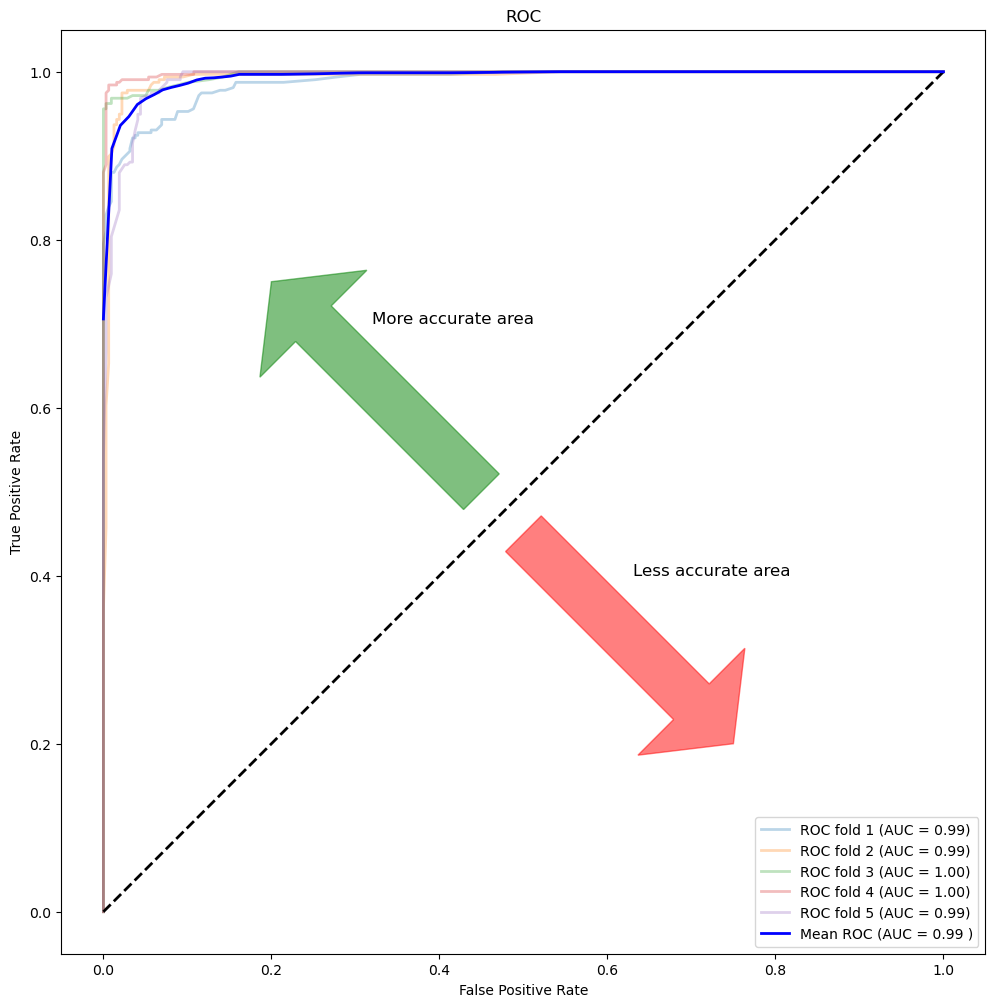

In [6]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# CONCLUSION
* In this example ROC is used for binary classes. Although it is mostly used for binary classes, it actually can be used for multi classes.
* **If you have any suggest, question or comment, I will be happy to hear it.**